In [1]:
import sys

sys.path.insert(0, '../../PSC')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from PSC import projections
from PSC.data import sphere_point_cloud
from PSC import comparison

INFO: Using numpy backend


# Comparison Visualization

In [4]:
base_alpha = np.array([[1,0],[0,1],[0,0]])

In [5]:
N=3
n=2
k=1
s=100
concentration=0.05
epsilon=0.5

sample=sphere_point_cloud(N,n,s,epsilon, alpha=base_alpha)
print(sample['ys'].shape)

(100, 3, 1)


In [6]:
projected = comparison.PSC_points(sample['ys'], n)
print(projected[0].shape, projected[1].shape)

(100, 2, 1) (3, 2)


In [7]:
geodesic_projected = comparison.PGA_points(sample['ys'].reshape(s, N), n)
print(geodesic_projected.shape)

(100, 3)


In [8]:
geodesic_projected_mean = comparison.frechetmean(geodesic_projected.reshape(s,N), N, k)
print(geodesic_projected_mean)

[[ 0.01867562]
 [-0.08691061]
 [ 0.99604105]]


In [9]:
projected_mean=comparison.frechetmean(projected[0].reshape(s,n), n, k)
mean=comparison.frechetmean(sample['ys'].reshape(s,N), N, k)
print(projected_mean)
print(mean)

[[-0.87023728]
 [-0.4926328 ]]
[[ 0.0218174 ]
 [-0.08736236]
 [ 0.99593766]]


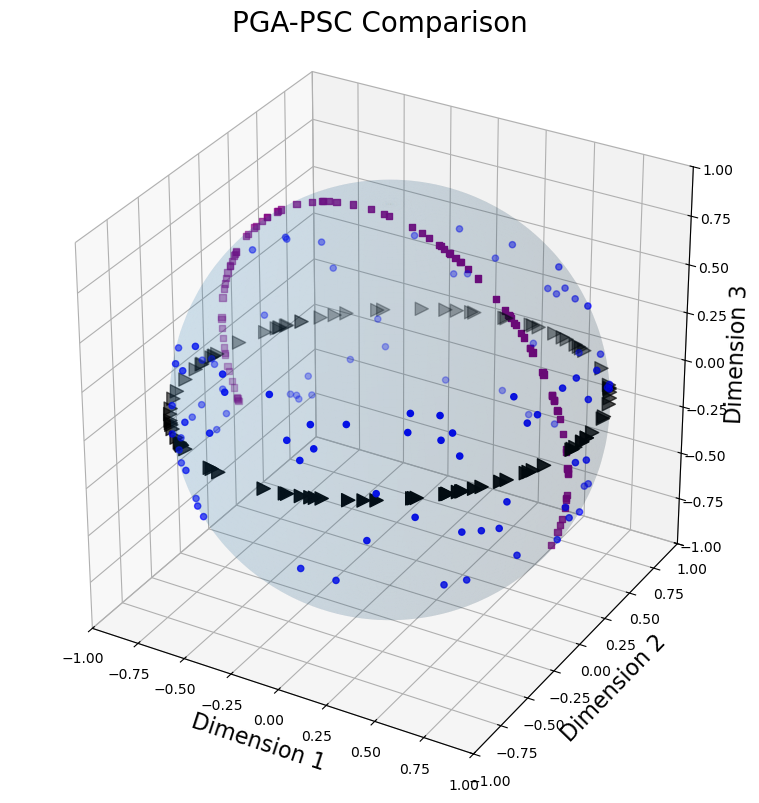

In [10]:
X=projected[1].dot(projected[0]).transpose((1,0,2)) #in black
Y=sample['ys'] #in blue
Z=geodesic_projected

title='PGA-PSC Comparison'
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
u, v = np.mgrid[0: 2 * np.pi : 100j, 0: np.pi :100j]
xx = np.cos(u) * np.sin(v)
yy = np.sin(u) * np.sin(v)
zz = np.cos(v)

ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, alpha=0.1, linewidth=0)
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c='blue', s=20) #Original points
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='black', s=90, marker=">") #Stiefel projected
ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c='purple', s=20, marker="s") #Geodesic projected
#ax.scatter(geodesic_projected_mean[0], geodesic_projected_mean[1], geodesic_projected_mean[2], c='purple', s=20)
#ax.scatter(projected_mean[0], projected_mean[1], projected_mean[2], c='red', s=20)
#ax.scatter(mean[0], mean[1], mean[2], c='green', s=90, marker=">")
ax.set_xlabel('Dimension 1', fontsize=16)
ax.set_ylabel('Dimension 2', fontsize=16)
ax.set_zlabel('Dimension 3', fontsize=16)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
ax.set_zlim([-1,1])
ax.set_box_aspect((1,1,1))
plt.title(title, fontsize=20)
plt.tight_layout()
plt.show()

# Explained Variance Comparison with PGA

In [11]:
N=11
n=6
s=200
eps_vec=[0.01,0.05,0.1,0.5]
n_components=5
t=100
var_data = comparison.output_var_df(N, n, s, t, eps_vec, n_components)
var_data.to_pickle("var_data.pkl")

In [12]:
#var_data=pd.read_pickle("var_data.pkl")

In [13]:
from plotnine import ggplot, aes, geom_line, geom_point, labs, geom_smooth, facet_grid, facet_wrap, labeller, element_text, theme

def plot_averages(var_data, output="show"):
  averaged_variances = var_data.groupby(['epsilon','dims'],as_index=False)[['PSC','PGA']].mean()
  scores_tall = averaged_variances.melt(id_vars=['dims','epsilon'], value_vars=['PSC','PGA'])
  def epsilon_labels(s):
    return r'$\epsilon$ = ' + str(s)
  plot=(
  ggplot(scores_tall, aes('dims', 'value', color='variable')) + geom_line(size=2)+ facet_wrap('~epsilon', labeller=labeller(cols=epsilon_labels))+labs(x="Principal Components (Dimension)",y="Variance Ratio",color="Method")
  )
  if output=="save":
    plot.save("var_ratio.png")
  else:
    plot.draw(show=True)

In [14]:
plot_averages(var_data, output="save")

/opt/anaconda3/envs/psc/lib/python3.10/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/envs/psc/lib/python3.10/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: var_ratio.png
INFO: Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt
